<a href="https://colab.research.google.com/github/jthaller/pentacene_TI_ML_2/blob/master/submitted_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#IMPORTS
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# machine learning
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
# from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from sklearn.preprocessing import PolynomialFeatures

sns.set()
%matplotlib inline

In [0]:
atom_types_df = pd.read_pickle("atom_types.pic")
#print(atom_types_df)
coulomb_df = pd.read_pickle("coulomb_interactions.pic")
#print(coulomb_df)
TI_df = pd.read_pickle("TI.pic")
#print(TI_df)

In [0]:
coulomb_df = StandardScaler().fit_transform(coulomb_df)

x = coulomb_df
y = np.log10(TI_df)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7500, 900) (2500, 900) (7500, 1) (2500, 1)


# Data Exploration

[0.39883684 0.01665011 0.01551659 0.0147206  0.01440443 0.01332243
 0.01318127 0.01250725 0.01227408 0.01216571 0.01200445 0.0113606
 0.01087055 0.01072967 0.01054396 0.01009577 0.00964735 0.00937158
 0.0092654  0.0089232  0.00829214 0.00771498 0.00759517 0.00715996
 0.00684035 0.00638596 0.00631351 0.00602103 0.00596616 0.00584006
 0.00543744 0.00532607 0.00523461 0.00512647 0.00501065 0.00494523
 0.00463899 0.00455544 0.00449203 0.00436963 0.00421746 0.00392949
 0.00384539 0.00376409 0.00358976 0.00355774 0.00344201 0.00335124
 0.0032467  0.00321148 0.00308465 0.00288038 0.00284629 0.00278728
 0.00255519 0.00243051 0.0023573  0.0021662  0.00186433 0.00181202]
(7500, 60) (2500, 60)


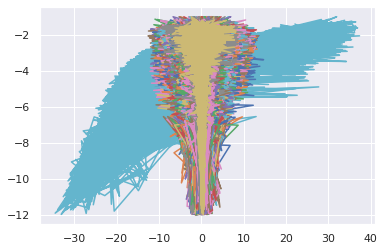

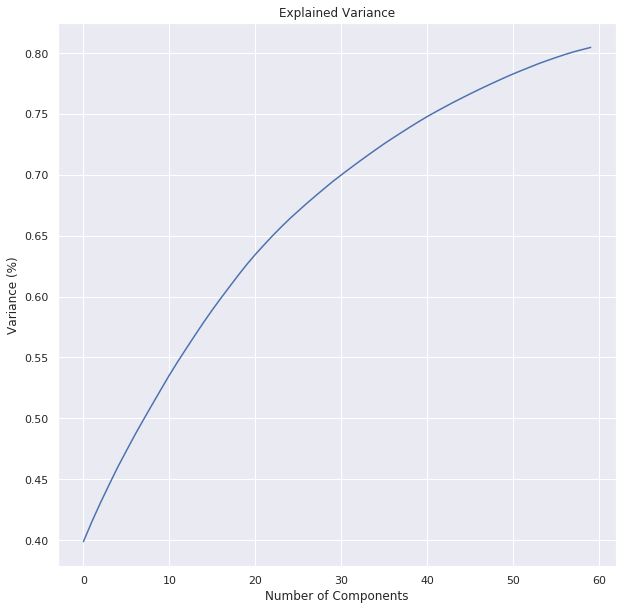

<Figure size 720x720 with 0 Axes>

In [0]:
# Plot data to explore different properties

plt.plot(x[:, 1:100], y)

#one can immediately obtain that there is a clear quadratic path and the values are constrainted.
#there is a lot of great potential to minimize the amount of features
#maybe due to normalization

# Principal Component Analysis

pca = PCA(n_components=60)
pca.fit(x, y)
print(pca.explained_variance_ratio_)

x_pca = pca.transform(x)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

print(x_train_pca.shape, x_test_pca.shape)
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(x_pca, y)
plt.savefig('pca_features')

#already two components give insight about how the data is structured, increasing
#the number of components would not give a lot more further insight
#to find the best values we plot the variance against components

# how many PCAs are enough

plt.figure()
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()
plt.savefig('explained_variance')

# playing with the number of components shows that 60 components gives you over
#0.8% variance, which is enough


# Apply Machine Learning Models

# Linear Regression


RMSE: 0.795003


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


mean_squard_error: 1.002949261587887
standard_deviation: 1.187689627016626
RMSE: 1.127094


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


mean_squared_errors: [4.54992285 0.62048235 0.69505428 0.5362608  0.60781579 0.7324436
 0.52579184 0.41856378 0.51655587 0.82660146]
mean_squard_error: 1.002949261587887
standard_deviation: 1.187689627016626


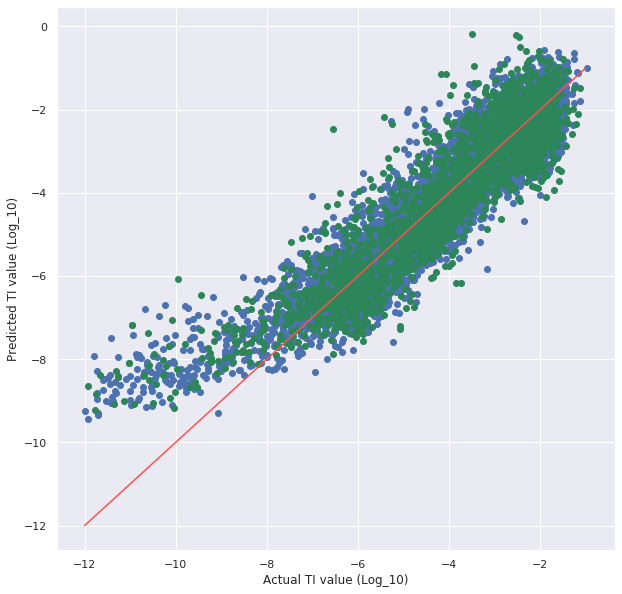

In [0]:
# Linear Regression --------------------
linreg = LinearRegression()
linreg.fit(x_train, y_train)
Y_pred = linreg.predict(x_test)

# Compute the rmse from sklearns metrics module imported earlier
rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
print("RMSE: %f" % (rmse))
kfold = KFold(n_splits=10, random_state=7)
results = -1*cross_val_score(linreg, x, y, cv=kfold, scoring='neg_mean_squared_error')
# Note to self:
# The unified scoring API always maximizes the score, so scores which need to be minimized are negated in order for the unified scoring API to work correctly.
# The score that is returned is therefore negated when it is a score that should be minimized and left positive if it is a score that should be maximized.
results
results.mean()
print(f"mean_squard_error: {results.mean()}\nstandard_deviation: {results.std()}")
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Actual TI value (Log_10)')
plt.ylabel('Predicted TI value (Log_10)')
plt.plot(range(-12,0), range(-12,0), '-',c='#ff5050') 
plt.scatter(y_train,linreg.predict(x_train))
plt.scatter(y_test,Y_pred,c='#2d8659')

# --- with pca -------
linreg.fit(x_train_pca, y_train)
Y_pred_pca = linreg.predict(x_test_pca)

# with pca compute rmse 
rmse = np.sqrt(mean_squared_error(y_test, Y_pred_pca))
print("RMSE: %f" % (rmse))
kfold = KFold(n_splits=10, random_state=7)
results = -1*cross_val_score(linreg, x, y, cv=kfold, scoring='neg_mean_squared_error')
print("mean_squared_errors: " + str(results))
print(f"mean_squard_error: {results.mean()}\nstandard_deviation: {results.std()}")

# --- without pca ---
# RMSE = 0.795003 without pca or k-fol
## ----with k-fold----
## mean_squard_error: 1.002949261587887
## standard_deviation: 1.187689627016626

# --- with pca ---
# RMSE: 1.129056 with pca but no k-fold.
# mean_squard_error: 1.002949261587887
# standard_deviation: 1.187689627016626


# Polynomial Regression

The model performance for the training set for polynomial regression
-------------------------------------------
RMSE of training set is 0.504967573470091
R2 score of training set is 0.929042243353226


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.7030203950132999


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


mean_squared_errors: [8.88970078 1.23264532 0.53710889 0.9790619  1.84659161 1.98651419
 0.88108639 0.45071438 0.37345491 0.51675036]
mean_squared_error: 1.7693628714533371
standard_deviation: 2.4336985879260977


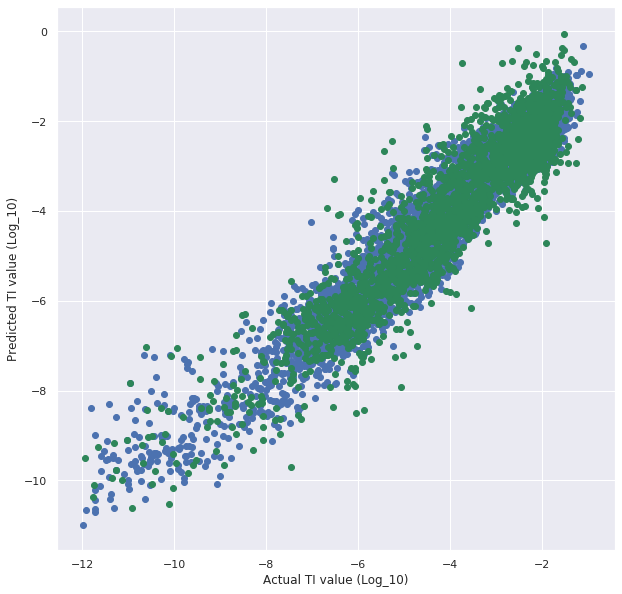

In [0]:
# %% Polynomial Regression

# transform existing features to higher degree features
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train_pca)

# fit the transformed features to Linear Regression
poly_reg = LinearRegression()
poly_reg.fit(x_train_poly, y_train)

# predict on the training data set
y_train_pred = poly_reg.predict(x_train_poly)

# predict on test data set
y_test_pred = poly_reg.predict(poly.fit_transform(x_test_pca))

# evaluating poly regression on training data set
rmse_train_poly_reg = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train_poly_reg = r2_score(y_train, y_train_pred)

# evaluating poly regression on test data set
rmse_test_poly_reg = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_test_poly_reg = r2_score(y_test, y_test_pred)

print("The model performance for the training set for polynomial regression")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train_poly_reg))
print("R2 score of training set is {}".format(r2_train_poly_reg))
print("\n")
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test_poly_reg))

#The model performance for the training set for polynomial regression
#-------------------------------------------
#RMSE of training set is 0.5126787662046659
#R2 score of training set is 0.927557561333646
#
#
#The model performance for the test set
#-------------------------------------------
#RMSE of test set is 0.7036776296072091
#R2 score of test set is 0.8558626443244092


#cross validation -------------
kfold = KFold(n_splits=10, random_state=7)
results = -1*cross_val_score(poly_reg, x_pca, y, cv=kfold, scoring='neg_mean_squared_error')
print('mean_squared_errors: ' + str(results))
print(f"mean_squared_error: {results.mean()}\nstandard_deviation: {results.std()}")
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(y_train,y_train_pred)

plt.xlabel('Actual TI value (Log_10)')
plt.ylabel('Predicted TI value (Log_10)') 
plt.scatter(y_test,y_test_pred,c='#2d8659')

# mean_squared_errors: [8.92539671 1.24277882 0.53544367 0.97998094 1.85069762 1.98805718
#  0.88201865 0.455358   0.37556103 0.51088562]
# mean_squard_error: 1.774617823490909
# standard_deviation: 2.4438984231990983


# Random Forrest Regressor

In [0]:
# %% Random Forest Regressor

def rfr_model(X_forreg, y_forreg_train):# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,                         n_jobs=-1)
    
    grid_result = gsc.fit(X_forreg, y_forreg_train)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)# Perform K-Fold CV
    scores = cross_val_score(rfr, X_forreg, y_forreg_train, cv=10, scoring='r2')

    return scores.mean(), best_params, rfr

score_train, best_parameters, rfr_most_important = rfr_model(x_train_pca, y_train) 
print(score_train)

# fit random forrest model
rfr_most_important.fit(x_train_pca, y_train)

# make predictions from random forrest
y_pred_forreg = rfr_most_important.predict(x_test_pca)

# access prediction on test data
rmse_forreg = np.sqrt(mean_squared_error(y_test, y_pred_forreg))
print("RMSE of Random Forrest Regression: %f" % (rmse_forreg))

#best parameters are max_depth of 6 and n_estimators of 1000
#final r2 mean score for train data is 0.8649559575542828
#random forrest Root Mean Square Error 0.699682
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Actual TI value (Log_10)')
plt.ylabel('Predicted TI value (Log_10)') 
plt.scatter(y_test,y_pred_forreg)

#generate plot
sns.set()
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(y_train,rfr_most_important.predict(x_train_pca))

plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Actual TI value (Log_10)')
plt.ylabel('Predicted TI value (Log_10)')
plt.scatter(y_test,y_pred_forreg, c='#2d8659')

#cross validation -------------
rfr.fit(x_train_pca, y_train)
kfold = KFold(n_splits=10, random_state=7)
x_pca = pca.transform(x)
y_train_pred = rfr.predict(x_train_pca)
results = -1*cross_val_score(rfr, x_pca, y, cv=kfold, scoring='neg_mean_squared_error')
print('mean_squared_errors: ' + str(results))
print(f"mean_squared_error: {results.mean()}\nstandard_deviation: {results.std()}")
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(y_train,y_train_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d ar

0.8641707672095581


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


ValueError: ignored

## XGBoost Regressor with k-fold cross validation

RMSE: 0.601893
49    0.669425
Name: test-rmse-mean, dtype: float64
RMSE: 0.601893


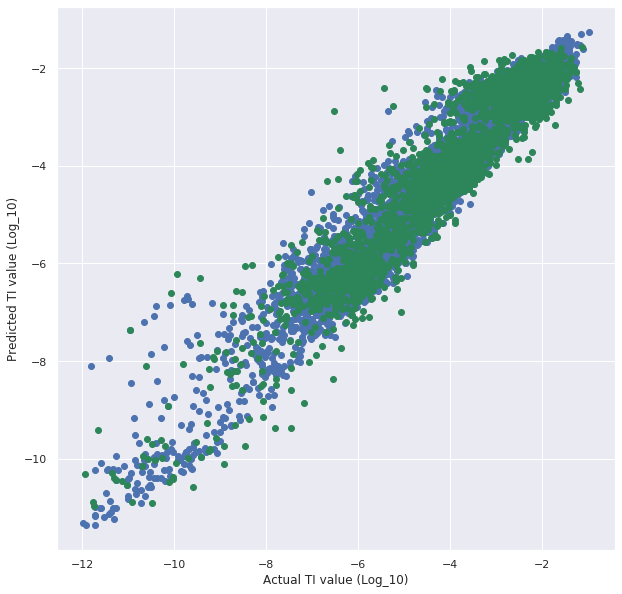

In [0]:
## XGBoost ----------------------
xgboost = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators =100)
xgboost.fit(x_train_pca, y_train)
Y_pred= xgboost.predict(x_test_pca)
rmse = np.sqrt(mean_squared_error(y_test, Y_pred)) #It doesn't make sense to do an accuracy score like in titanic
print("RMSE: %f" % (rmse))


#-------k-fold Cross Validation using XGBoost-------
# code based off this:  https://www.kaggle.com/tmkggl/xgboost-regression-problem
# XGBoost supports the k-fold cross validation with the cv() method
# nfolds is number of cross-validation sets to be build
# More parameters in XGBoost API reference: https://xgboost.readthedocs.io/en/latest/python/python_api.html

#Create Hyper Parameter dictionary params and exclude n_estimators and include num_boost_rounds
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3, 'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}

# nfold is 3, so three round cross validation set using XGBoost cv()
# cv_results include the train and test RMSE metrics for each round
# Separate targetvariable and the rest of the variables

# Convert to optimized data-structure, which XGBoost supports
data_dmatrix = xgb.DMatrix(data=x_train_pca,label=y_train)
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

# Print Final boosting round metrics
# The final result may depend upon the technique used, so you may want to try different
# e.g. grid search, random search Bayesian optimization
print((cv_results["test-rmse-mean"]).tail(1))
rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
print("RMSE: %f" % (rmse))


sns.set()
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(y_train,xgboost.predict(x_train_pca))

plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Actual TI value (Log_10)')
plt.ylabel('Predicted TI value (Log_10)')
plt.scatter(y_test,Y_pred, c='#2d8659')

# --Results --


## Keras (TensorFlow)

Epoch 1/10
7500/7500 [==============================] - 5s 625us/step - loss: 1.4496 - mean_absolute_error: 0.8174
Epoch 2/10
7500/7500 [==============================] - 4s 472us/step - loss: 0.4616 - mean_absolute_error: 0.5101
Epoch 3/10
7500/7500 [==============================] - 4s 488us/step - loss: 0.3893 - mean_absolute_error: 0.4719
Epoch 4/10
7500/7500 [==============================] - 4s 468us/step - loss: 0.3499 - mean_absolute_error: 0.4458
Epoch 5/10
7500/7500 [==============================] - 3s 464us/step - loss: 0.3167 - mean_absolute_error: 0.4273
Epoch 6/10
7500/7500 [==============================] - 4s 494us/step - loss: 0.3194 - mean_absolute_error: 0.4300
Epoch 7/10
7500/7500 [==============================] - 3s 464us/step - loss: 0.3025 - mean_absolute_error: 0.4165
Epoch 8/10
7500/7500 [==============================] - 3s 456us/step - loss: 0.2922 - mean_absolute_error: 0.4105
Epoch 9/10
7500/7500 [==============================] - 4s 499us/step - loss: 0.

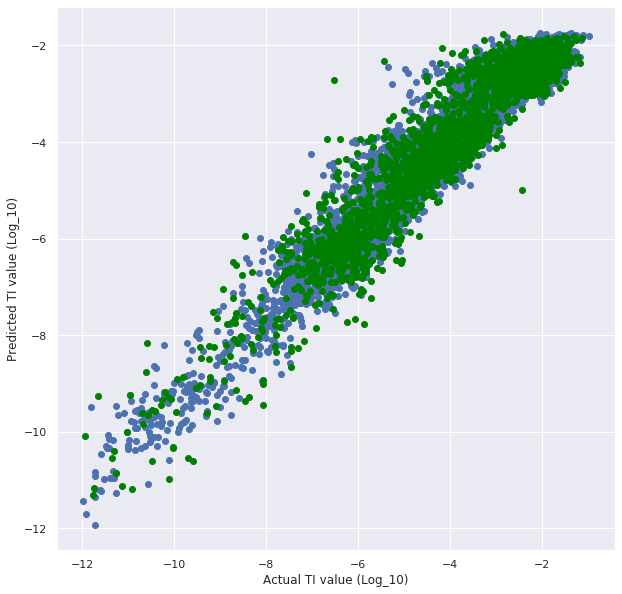

In [22]:
# %%Neural Network

# define the keras model
neuraln = Sequential()
# optional addition of regularizer didn't do anything
# from keras import regularizers
# neuraln.add(Dense(128, input_dim=60, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
neuraln.add(Dense(128, input_dim=60, activation='relu'))
neuraln.add(Dense(256, kernel_initializer='normal',activation='relu'))
neuraln.add(Dense(256, kernel_initializer='normal',activation='relu'))
neuraln.add(Dense(256, kernel_initializer='normal',activation='relu'))
neuraln.add(Dense(1, kernel_initializer='normal', activation='linear'))
# from keras import regularizers
# neuraln.add(kernel_regularizer=regularizers.l2(0.01))

#compile keras
# neuraln.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
neuraln.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

#fit keras
neuraln.fit(x_train_pca, y_train, epochs=10, batch_size=10)

# evaluate the keras model
# make class predictions with the model
y_pred_neuraln= neuraln.predict(x_test_pca)
# summarize the first 5 cases
rmse_neuraln = np.sqrt(mean_squared_error(y_test, y_pred_neuraln))
print("RMSE of Neural Network: %f" % (rmse_neuraln))
#plot the result


sns.set()
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(y_train,neuraln.predict(x_train_pca))

plt.rcParams["figure.figsize"] = (15,15)
plt.xlabel('Actual TI value (Log_10)')
plt.ylabel('Predicted TI value (Log_10)')
plt.scatter(y_test,y_pred_neuraln,c='#008000')

#RMSE = 0.553527


rmse = np.sqrt(mean_squared_error(y_test, y_pred_neuraln))
print("RMSE: %f" % (rmse))

# Kernal Ridge

      TransInt
6252 -2.621861
4684 -4.055324
1731 -6.065697
4742 -3.825356
4521 -3.802033
...        ...
4862 -4.176311
7025 -2.514344
7647 -2.295487
7161 -2.351812
73   -6.922753

[2500 rows x 1 columns]
[[-4.02635065]
 [-4.03236551]
 [-2.98837585]
 ...
 [-3.51960383]
 [-6.6526472 ]
 [-2.58684444]]
RMSE of Keras 0.741309


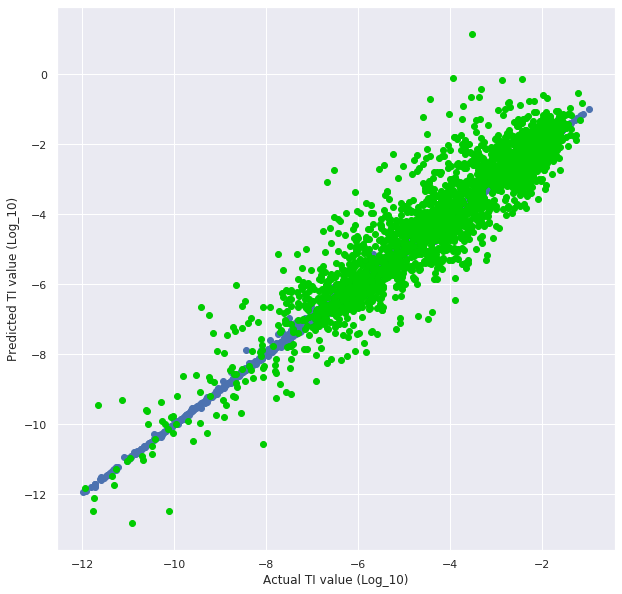

In [0]:
best_alpha=0.001
model_ridge = KernelRidge(kernel = 'rbf', gamma = 0.01, alpha = best_alpha).fit(x_train_pca, y_train)
##plotting x,y as train, prediction. If perfect should be a line with slope of 1
y_pred = model_ridge.predict(x_train_pca)
round(model_ridge.score(x_test_pca, y_test) * 100, 2)

sns.set()
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(y_train,y_pred)

y_pred_ridge = model_ridge.predict(x_test_pca)
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Actual TI value (Log_10)')
plt.ylabel('Predicted TI value (Log_10)')
plt.scatter(y_test,y_pred_ridge, c='#008000')
print(y_test);
print(y_pred);

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("RMSE of Keras %f" % (rmse_ridge))


#RMSE of 0.799

#Make Final Prediction

In [0]:
coulomb_df_test = pd.read_pickle("coulomb_interactions_test_data.pic")
print(coulomb_df_test)
x_test_pca = pca.transform(coulomb_df_test)

#insert best model here and make final predictions called y_pred
#fit keras
neuraln.fit(x_pca, y, epochs=100, batch_size=10)
y_pred = neuraln.predict(x_test_pca)
y_pred = 10 ** y_pred #undo the y = np.log10(TI_df) used by the training
print(y_pred)

pickle_out = open("TI_preds.pickle","wb")
pickle.dump(y_pred, pickle_out)
pickle_out.close()

prediction = pd.DataFrame(y_pred, columns=['predictions']).to_csv('TI_test_pred.csv')


           0         1          2    ...       897       898       899
0     1.771002  2.166665   1.985215  ...  0.044330  0.047217  0.052930
1     1.847897  1.855246   1.491328  ...  0.042989  0.040658  0.055382
2     3.066000  3.220077   3.240873  ...  0.054655  0.057290  0.041475
3     2.595049  2.592887   2.692506  ...  0.068637  0.078272  0.078532
4     2.325588  2.631963   2.315102  ...  0.061978  0.070254  0.061924
...        ...       ...        ...  ...       ...       ...       ...
2995  8.184931  5.940110   6.352292  ...  0.242390  0.153982  0.147227
2996  7.055451  6.616545   7.754749  ...  0.170415  0.108859  0.093206
2997  5.383721  5.140168   2.844561  ...  0.073017  0.169668  0.230748
2998  3.031633  7.675252   3.699100  ...  0.147489  0.185406  0.279911
2999  7.973374  4.191446  10.002194  ...  0.152200  0.109016  0.072073

[3000 rows x 900 columns]
Epoch 1/100
10000/10000 [==============================] - 5s 462us/step - loss: 0.3918 - mean_absolute_error: 0.3918
Epo